In [1]:
%pylab inline
datN = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_Nomoto2013_net.npz')
datC = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_chieffi04_net.npz')
datR = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_NuGrid_net.npz')
datW = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_West17_net.npz')
datT = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_TNG_net.npz')
name_list = ['C04','N13','W17','R17','TNG']
shape_list = ['o','s','*','^','D']
color_list = ['r','b','m','k','c']

data_list = [datC,datN,datW,datR,datT]#[dat,dat,dat1]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = datN['elements']
scores = [dat['scores'] for dat in [datC,datN]]
norm_scores = [dat['normalised_scores'] for dat in [datW,datR,datT]]

datC.close()
datN.close()
datW.close()
datR.close()
datT.close()

Populating the interactive namespace from numpy and matplotlib


In [16]:
#  Reorder
alpha_names = ['He','C','N','O','Ne','Mg','Si','Fe']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [11]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

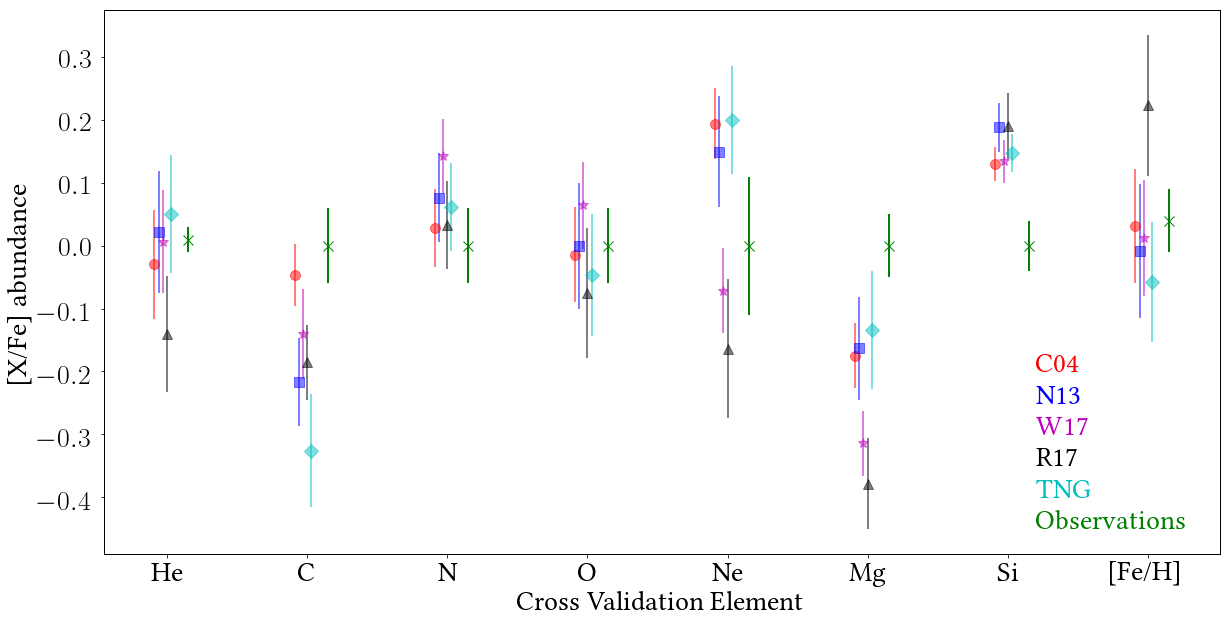

In [12]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 28
marker_size= 10
small_text = 28
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(5):
    plt.errorbar(np.arange(len(alpha_names))+np.ones(len(alpha_names))*(i-3)*0.03,alphamean[i],alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(6.2,-0.2-0.05*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names))+np.ones(len(alpha_names))*(5)*0.03,ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(6.2,-0.2-0.05*5,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
elements = elements.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/Illustris_element_prediction.pdf',dpi=300,bbox_inches='tight')

In [13]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

# Table of scores
n_el = 8#len(a.initial_neural_names)
print('Yield Set \t Rescaled LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))
for j in range(3):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[j+2],np.median(norm_scores[j]), np.percentile(norm_scores[j],100-15.865)-np.median(norm_scores[j]),
                                     np.median(norm_scores[j])-np.percentile(norm_scores[j],15.865)))

Yield Set 	 Rescaled LOO-CV Score
---------------------------------
C04: 		 0.23 + 0.01 - 0.01
N13: 		 0.02 + 0.02 - 0.03
W17: 		 -0.18 + 0.03 - 0.01
R17: 		 -0.40 + 0.05 - 0.04
TNG: 		 -0.02 + 0.01 - 0.01


# BAYES SCORES 

In [20]:
# Load datasets
bdatN = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
bdatC = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
bdatR = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - NuGrid_net, Karakas_net_yield, Seitenzahl.npz')
bdatW = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - West17_net, Karakas_net_yield, Seitenzahl.npz')
bdatT = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - TNG_net, Karakas_net_yield, Seitenzahl.npz')
bdat_list = [bdatC,bdatN,bdatW,bdatR,bdatT]
bnames = ['C04','N13','W17','R17','TNG']

bscores = [bdat['score'] for bdat in bdat_list]
bscores_err = [bdat['score_err'] for bdat in bdat_list]

bdatC.close()
bdatN.close()
bdatW.close()
bdatR.close()
bdatT.close()

In [21]:
# Table of scores
print('Yield Set \t Bayes Score')
print('----------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.4f +/- %.4f' %(bnames[i],np.log10(bscores[i]),bscores_err[i]/(bscores[i]*np.log(10))))

Yield Set 	 Bayes Score
----------------------------------
C04: 		 1.6105 +/- 0.0021
N13: 		 0.6475 +/- 0.0027
W17: 		 0.7275 +/- 0.0015
R17: 		 -0.4892 +/- 0.0019
TNG: 		 0.3890 +/- 0.0032


In [ ]:
from Chempy.yields import SN2_feedback
basic_sn2 = SN2_feedback()
getattr(basic_sn2,'Frischknecht16_net')()

In [ ]:
from Chempy.yields import SN2_feedback
basic2_sn2 = SN2_feedback()
getattr(basic2_sn2,'Nomoto2013_net')()

In [ ]:
from Chempy.yields import SN2_feedback
basic3_sn2 = SN2_feedback()
getattr(basic3_sn2,'chieffi04_net')()

In [ ]:
basic3_sn2.table[1e-3][-1]

In [ ]:
dN=basic2_sn2.table[1e-3][1]
dF=basic_sn2.table[1e-3][0]
dC = basic3_sn2.table[1e-3][1]

small_dat = [[],[],[]]

for j,data in enumerate([dN,dF,dC]):
    for el in a.element_names:
        for i in range(len(data)):
            if data.dtype.names[i] == el:
                small_dat[j].append(data[i])

N = small_dat[0]
F = small_dat[1]
C = small_dat[2]
                
diff = []
print('Property:    N13 \t F16       \t C04')
print('---------------------------------------------------')
for i in range(len(a.element_names)):
    print('%s \t %.3e \t %.3e \t %.3e' %(a.element_names[i],N[i],F[i],C[i]))
#    diff.append(np.log10(dN[i]/dF[i]))
    
#for i in range(len(dN)):
#    print('%s \t %.3e' %(dN.dtype.names[i],diff[i]))

In [ ]:
basic2_sn2.masses

In [ ]:
basic_sn2.masses

In [ ]:
basic_sn2.table[1e-3][0]['Fe']

In [ ]:
(-4.003516405e-06-4.066417232e-05+4.503507935e-06+1.855557654e-05)/15

In [ ]:
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar,'Asplund09')()

In [ ]:
basic_solar.fractions
basic_solar.all_elements
basic_solar.fractions[25] # Fe

In [ ]:

basic2_sn2.metallicities

In [ ]:
nomdat = np.load('Chempy/input/yields/Nomoto2013/nomoto_net_met_ind_1.npy')

In [ ]:
nomdat[1]['Fe']

In [48]:
from Chempy.yields import SN2_feedback
nom = SN2_feedback()
tng = SN2_feedback()
getattr(nom,'Nomoto2013_net')()
getattr(tng,'TNG_net')()

In [50]:
print('Nomoto')
for m_index in range(len(nom.masses)):
    print(nom.masses[m_index],nom.table[0.001]['O'][m_index])

print('\n TNG (Nomoto mass cut)')
for m_index in range(3,10):
    print(tng.masses[m_index],tng.table[tng.metallicities[1]]['O'][m_index])#/corr[m_index])




Nomoto
13 0.0385189221189
15 0.0191621580419
18 0.023028153564
20 0.108696224129
25 0.152284199576
30 0.177165735065
40 0.208894506873

 TNG (Nomoto mass cut)
13.0 0.043602026999
15.0 0.021413186565
18.0 0.0258508045226
20.0 0.124671474099
25.0 0.175258755684
30.0 0.203986912966
40.0 0.240563154221


In [36]:
corr = [1-x for x in tng.table[tng.metallicities[1]]['mass_in_remnants']]

In [27]:
tng.table[tng.metallicities[1]]['mass_in_remnants']

array([ 0.38861728,  0.36569378,  0.32242894,  0.33149698,  0.31639263,
        0.30857098,  0.25509781,  0.21807297,  0.19771399,  0.20568724,
        0.4922365 ,  0.48410556,  0.45311591], dtype=float32)

In [30]:
tng.metallicities[1]

0.001

In [44]:
nom.metallicities

[0.02, 0.01, 0.006, 0.001, 0.0001]